In [1]:
## CREATING AIRPORT DATABASE: LISTS OBJECTS
#import csv
#
#airports = []
#airport_file_path = '/home/scarpma/Scaricati/complex/airports.csv'
#with open(airport_file_path) as file:
#    reader = csv.reader(file, delimiter=',') 
#    for line in reader:
#        del line[8:]
#        del line[0]
#        for i in range(5,7):
#            try: line[i] = float(line[i])
#            except: print(f"problem in converting field {i} of line\n {line}")
#        airports.append(line)
#        
## airport name, city, country, IATA, ICAO, GPS_lat, GPS_long
#
## CREATING NETWORKS STRUCTURE: NODES
#import networkx as nx
#
#network = nx.MultiDiGraph()
#for airport_IATA in [x[3] for x in airports]:
#    network.add_node(airport_IATA)
#
##nx.draw_networkx(network)

In [2]:
# CREATING AIRPORT DATABASE: PERSONALIZED OBJECTS
import csv

class Airport:
    name = ""
    city = ""
    country = ""
    iata = ""
    icao = ""
    lat = 0.
    long = 0.

airports = []
airport_file_path = '/home/scarpma/Scaricati/complex/airports.csv'
with open(airport_file_path) as file:
    reader = csv.reader(file, delimiter=',') 
    for line in reader:
        airport = Airport()
        airport.name = line[1]
        airport.city = line[2]
        airport.country = line[3]
        airport.iata = line[4]
        airport.icao = line[5]
        airport.lat = float(line[6])
        airport.long = float(line[7])
        airports.append(airport)

In [3]:
## CREATING ROUTES DATABASE: LISTS OBJECTS
#import csv
#
#routes = []
#routes_file_path = '/home/scarpma/Scaricati/complex/routes.csv'
#with open(routes_file_path) as file:
#    reader = csv.reader(file, delimiter=',') 
#    for line in reader:
#        del line[5:]
#        del line[3]
#        del line[:2]
#        #if (len(line[0])==4 or len(line[1])==4): print("problem")
#        routes.append(line)
#
## source airport IATA, destination airport IATA
#
## CREATING NETWORKS STRUCTURE: EDGES
#for route in routes:
#    network.add_edge(route[0], route[1])

In [26]:
# CREATING ROUTES DATABASE: PERSONALIZED OBJECTS
import csv

class Route:
    source_iata = ""
    source_icao = ""
    dest_iata = ""
    dest_icao = ""
    flights = 0

routes = []
routes_file_path = '/home/scarpma/Scaricati/complex/routes.csv'
with open(routes_file_path) as file:
    reader = csv.reader(file, delimiter=',') 
    for line in reader:
        route = Route()
        if len(line[2])==3:
            route.source_iata = line[2]
        elif len(line[2])==4:
            route.source_icao = line[2]
        else: print("problem", line)
        if len(line[4])==3:
            route.dest_iata = line[4]
        elif len(line[4])==4:
            route.dest_icao = line[4]
        else: print("problem", line)
        routes.append(route)

dests = []
for route in routes:
    if route.source_iata == "FCO":
        dests.append(route.dest_iata)
dests.sort()
print(dests)
    
# source airport IATA, destination airport IATA

['ADD', 'AGP', 'AGP', 'AGP', 'AHO', 'ALC', 'ALC', 'ALG', 'ALG', 'AMM', 'AMM', 'AMM', 'AMS', 'AMS', 'AMS', 'AMS', 'AOI', 'ARN', 'ARN', 'ATH', 'ATH', 'ATH', 'ATH', 'ATH', 'ATL', 'ATL', 'ATL', 'ATL', 'ATL', 'AUH', 'AUH', 'BCN', 'BCN', 'BCN', 'BCN', 'BDS', 'BEG', 'BEG', 'BEG', 'BEY', 'BEY', 'BGO', 'BHX', 'BIO', 'BKK', 'BLQ', 'BOD', 'BOD', 'BOD', 'BOS', 'BOS', 'BRI', 'BRS', 'BRU', 'BRU', 'BRU', 'BRU', 'BRU', 'BRU', 'BSL', 'BSL', 'BUD', 'BUD', 'BUD', 'BZO', 'BZO', 'CAG', 'CAI', 'CAI', 'CCS', 'CDG', 'CDG', 'CDG', 'CGN', 'CLT', 'CLT', 'CMB', 'CMB', 'CMB', 'CMN', 'CMN', 'CPH', 'CPH', 'CPH', 'CPH', 'CTA', 'CTA', 'CTA', 'CTA', 'CTA', 'CTA', 'DAC', 'DBV', 'DEL', 'DEL', 'DME', 'DME', 'DOH', 'DUB', 'DUS', 'DUS', 'DUS', 'DXB', 'EVN', 'EWR', 'EWR', 'EZE', 'EZE', 'FLR', 'FRA', 'FRA', 'FRA', 'FUE', 'GDN', 'GIG', 'GLA', 'GOA', 'GOT', 'GRU', 'GVA', 'GVA', 'GVA', 'GVA', 'GYD', 'GYD', 'HAJ', 'HAM', 'HAM', 'HAV', 'HAV', 'HEL', 'HEL', 'HKG', 'IAD', 'IAS', 'IAS', 'ICN', 'ICN', 'IKA', 'IKA', 'IST', 'IST', 'JED'

In [5]:
def create_network(airports, routes):
    
    # CREATING NETWORKS STRUCTURE: NODES
    import networkx as nx

    network = nx.MultiDiGraph()
    for airport in airports:
        if not airport.iata =='\\N':
            network.add_node(airport.iata)
        elif not airport.icao =='\\N':
            network.add_node(airport.icao)
        else: print('problem', airport.name)
    
    # CREATING NETWORKS STRUCTURE: EDGES
    for route in routes:
        if not route.source_iata == "" :
            source = route.source_iata
        elif not route.source_icao == "" :
            source = route.source_icao
        else : print('problem', route)
        if not route.dest_iata == "" :
            dest = route.dest_iata
        elif not route.dest_icao == "" :
            dest = route.dest_icao
        else : print('problem', route)
        network.add_edge(source, dest)
    
    return network

In [21]:
# CREATING SUBGRAPH WITH ONLY ITALIAN AND CHINESE AIRPORTS AND ROUTES
sairports = []
sroutes = []
for airport in airports:
    if airport.country == "Italy" or airport.country == "China" :
        sairports.append(airport)

for route in routes:
    if not route.source_iata == "\\N" and not route.dest_iata == "\\N" :
        if route.source_iata in [airport.iata for airport in sairports] and route.dest_iata in [airport.iata for airport in sairports]:
            sroutes.append(route)
    else:
        print('problem')

        

print(len(sroutes))
network = create_network(sairports, sroutes)

7312


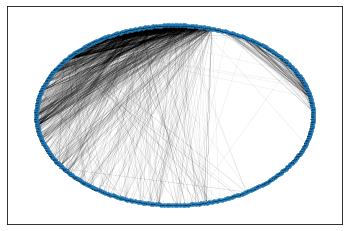

In [17]:
import networkx as nx
pos=nx.random_layout(network)

for airport in sairports:
    if airport.country=="Italy":
        if len(airport.iata) == 3 :
            pos[airport.iata][1] += 4

nx.draw_networkx(network, pos, node_size=12, font_size=2, width=0.02, arrowsize=0.5, aplha=0.4)

import matplotlib.pyplot as plt
#plt.savefig("network.png", dpi=700, format="PNG",)